In [ ]:
# Step 1: Upload the CSV
from google.colab import files
uploaded = files.upload()


Saving HDBK Historical Data (1).csv to HDBK Historical Data (1).csv


In [ ]:
# Step 2: Import libraries and load data
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load and clean data
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df = df.sort_values("Date")
df["Price"] = df["Price"].str.replace(",", "").astype(float)

# Step 3: Feature engineering
df["Prev_Close"] = df["Price"].shift(1)
df["2_Day_Avg"] = df["Price"].rolling(window=2).mean().shift(1)
df["3_Day_Avg"] = df["Price"].rolling(window=3).mean().shift(1)
df["5_Day_Avg"] = df["Price"].rolling(window=5).mean().shift(1)
df.dropna(inplace=True)

# Step 4: Prepare training data
features = ["Prev_Close", "2_Day_Avg", "3_Day_Avg", "5_Day_Avg"]
X = df[features]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Step 6: Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Model RMSE: {rmse:.2f}, R² Score: {r2:.2f}")

# Step 7: Predict Tomorrow’s Price
latest = df[features].iloc[-1:]
tomorrow_price = model.predict(latest)[0]
print(f"Predicted Price for Tomorrow: ₹{tomorrow_price:.2f}")



Model RMSE: 31.39, R² Score: 0.69
Predicted Price for Tomorrow: ₹1861.55


        Date   Actual    Predicted
0 2025-01-29  1677.30  1668.856323
1 2025-01-30  1691.50  1687.486572
2 2025-01-31  1698.75  1706.969238
3 2025-02-01  1690.95  1676.228882
4 2025-02-03  1678.00  1694.095337


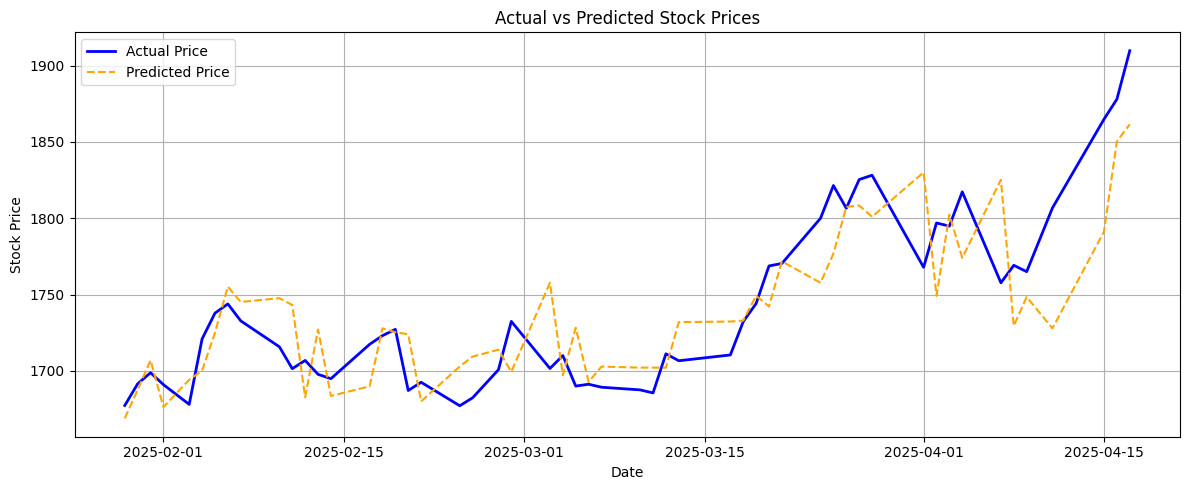

In [ ]:
# Step 8: Actual vs Predicted Comparison
results = pd.DataFrame({
    "Date": df["Date"].iloc[-len(y_test):].values,
    "Actual": y_test.values,
    "Predicted": y_pred
})

# Display head
print(results.head())

# Step 9: Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(results["Date"], results["Actual"], label="Actual Price", color="blue", linewidth=2)
plt.plot(results["Date"], results["Predicted"], label="Predicted Price", color="orange", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
